# Q1

In [11]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [19]:


import sqlite3
import pandas as pd

def get_top_10_highest_paid(db_path, table_name='Salaries'):
    """
    Connects to a SQLite database, retrieves the top 10 highest-paid employees,
    and returns them as a pandas DataFrame.

    Args:
        db_path (str): The path to the SQLite database file.
        table_name (str): The name of the table containing employee data.
                          Defaults to 'Salaries'.

    Returns:
        pandas.DataFrame: A DataFrame with the top 10 employees, or None if an error occurs.
    """
    try:
        # Database se connect karein
        conn = sqlite3.connect(db_path)

        # SQL query likhein. Yahan hum maan rahe hain ki table ka naam 'Salaries'
        # aur columns ke naam 'EmployeeName' aur 'TotalPayBenefits' hain.
        # Agar aapke table ya column ke naam alag hain, to is query mein badlav karein.
        query = f"""
        SELECT
            EmployeeName,
            TotalPayBenefits
        FROM {table_name}
        ORDER BY
            TotalPayBenefits DESC
        LIMIT 10;
        """

        # Query ko pandas DataFrame mein load karein
        df = pd.read_sql_query(query, conn)

        return df

    except sqlite3.OperationalError as e:
        print(f"Error: {e}")
        print(f"Please check if the table '{table_name}' and the columns 'EmployeeName', 'TotalPayBenefits' exist in your database.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
    finally:
        # Connection ko hamesha band karein
        if 'conn' in locals() and conn:
            conn.close()

# --- Code ko istemal karne ka tarika ---
if __name__ == "__main__":
    DATABASE_FILE = 'database.sqlite'
    
    # Function ko call karke top 10 employees ki list hasil karein
    top_employees_df = get_top_10_highest_paid(DATABASE_FILE)

    # Result ko print karein
    if top_employees_df is not None:
        if top_employees_df.empty:
            print("Database/Table mein koi data nahi mila.")
        else:
            print("Top 10 Highest Paid Employees (by TotalPayBenefits):")
            print(top_employees_df.to_string(index=False))

Top 10 Highest Paid Employees (by TotalPayBenefits):
        EmployeeName  TotalPayBenefits
      NATHANIEL FORD         567595.43
        GARY JIMENEZ         538909.28
         David Shinn         510732.68
          Amy P Hart         479652.21
William J Coaker Jr.         436224.36
      Gregory P Suhr         425815.28
Joanne M Hayes-White         422353.40
      Gregory P Suhr         418019.22
Joanne M Hayes-White         417435.10
     Ellen G Moffatt         415767.94


# Q2

In [25]:
import sys
import subprocess
import os

# Step 1: Zaroori library ko check aur install karna
def install_and_import(package):
    """
    Checks if a package is installed. If not, it installs it using pip.
    Then, it imports the package.
    """
    try:
        __import__(package)
        print(f"✅ '{package}' library pehle se installed hai.")
    except ImportError:
        print(f"⚠️ '{package}' library install nahi hai. Ise install kiya ja raha hai...")
        try:
            # pip ka istemal karke library install karein
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        except Exception as e:
            print(f"❌ ERROR: '{package}' ko install nahi kar paya. Kripya manually install karein: pip install {package}")
            print(f"Error details: {e}")
            sys.exit() # Agar install na ho to script band kar dein
    finally:
        # Ab library ko import karein
        globals()[package] = __import__(package)

# 'pandas' ko check aur install karein
install_and_import('pandas')

import sqlite3

# --- Database se jude functions ---

DATABASE_FILE = 'database.sqlite'

def check_db_file():
    """Checks if the database file exists in the current directory."""
    if not os.path.exists(DATABASE_FILE):
        print(f"❌ ERROR: Database file '{DATABASE_FILE}' is folder mein nahi mili.")
        print("Kripya script aur database file ko ek hi folder mein rakhein.")
        return False
    return True

def get_top_10_highest_paid(table_name='Salaries'):
    """
    Top 10 sabse zyada vetan wale employees ki list nikalta hai.
    """
    if not check_db_file():
        return

    try:
        conn = sqlite3.connect(DATABASE_FILE)
        query = f"""
        SELECT EmployeeName, TotalPayBenefits
        FROM {table_name}
        ORDER BY TotalPayBenefits DESC
        LIMIT 10;
        """
        df = pd.read_sql_query(query, conn)
        conn.close()

        if df.empty:
            print("\nIs table mein koi data nahi mila.")
        else:
            print("\n--- Top 10 Highest Paid Employees ---")
            print(df.to_string(index=False))

    except sqlite3.OperationalError:
        print(f"\n❌ ERROR: Table '{table_name}' ya uske columns ('EmployeeName', 'TotalPayBenefits') nahi mile.")
    except Exception as e:
        print(f"\nAn unexpected error occurred: {e}")


def find_years_with_missing_data(table_name='Salaries', column_to_check='JobTitle'):
    """
    Un saalon ka pata lagata hai jinmein data 'Not Provided' hai.
    """
    if not check_db_file():
        return

    try:
        conn = sqlite3.connect(DATABASE_FILE)
        query = f"""
        SELECT DISTINCT Year
        FROM {table_name}
        WHERE LOWER(TRIM({column_to_check})) = 'not provided';
        """
        df = pd.read_sql_query(query, conn)
        conn.close()

        years_list = df['Year'].tolist()

        if not years_list:
            print(f"\n✅ Kisi bhi saal mein '{column_to_check}' column mein 'Not Provided' data nahi mila.")
        else:
            print(f"\n--- In saalon mein '{column_to_check}' column mein 'Not Provided' data hai ---")
            for year in years_list:
                print(f"- {year}")

    except sqlite3.OperationalError:
        print(f"\n❌ ERROR: Table '{table_name}' ya uske columns ('Year', '{column_to_check}') nahi mile.")
    except Exception as e:
        print(f"\nAn unexpected error occurred: {e}")


def main_menu():
    """
    User ke liye ek interactive menu dikhata hai.
    """
    while True:
        print("\n" + "="*40)
        print("          DATABASE ANALYSIS MENU")
        print("="*40)
        print("Aap kya karna chahte hain?")
        print("1. Top 10 sabse zyada vetan wale employees dekhein")
        print("2. Pata karein kis saal mein data 'Not Provided' hai")
        print("3. Bahar niklein (Exit)")
        print("-"*40)

        choice = input("Apna option chunein (1, 2, ya 3): ")

        if choice == '1':
            get_top_10_highest_paid()
        elif choice == '2':
            find_years_with_missing_data()
        elif choice == '3':
            print("\n👋 Alvida! Script band ho rahi hai.")
            break
        else:
            print("\n⚠️ Ghalat option! Kripya 1, 2, ya 3 chunein.")


# --- Script Shuru Karein ---
if __name__ == "__main__":
    main_menu()

✅ 'pandas' library pehle se installed hai.

          DATABASE ANALYSIS MENU
Aap kya karna chahte hain?
1. Top 10 sabse zyada vetan wale employees dekhein
2. Pata karein kis saal mein data 'Not Provided' hai
3. Bahar niklein (Exit)
----------------------------------------


Apna option chunein (1, 2, ya 3):  1



--- Top 10 Highest Paid Employees ---
        EmployeeName  TotalPayBenefits
      NATHANIEL FORD         567595.43
        GARY JIMENEZ         538909.28
         David Shinn         510732.68
          Amy P Hart         479652.21
William J Coaker Jr.         436224.36
      Gregory P Suhr         425815.28
Joanne M Hayes-White         422353.40
      Gregory P Suhr         418019.22
Joanne M Hayes-White         417435.10
     Ellen G Moffatt         415767.94

          DATABASE ANALYSIS MENU
Aap kya karna chahte hain?
1. Top 10 sabse zyada vetan wale employees dekhein
2. Pata karein kis saal mein data 'Not Provided' hai
3. Bahar niklein (Exit)
----------------------------------------


Apna option chunein (1, 2, ya 3):  2



--- In saalon mein 'JobTitle' column mein 'Not Provided' data hai ---
- 2014

          DATABASE ANALYSIS MENU
Aap kya karna chahte hain?
1. Top 10 sabse zyada vetan wale employees dekhein
2. Pata karein kis saal mein data 'Not Provided' hai
3. Bahar niklein (Exit)
----------------------------------------


Apna option chunein (1, 2, ya 3):  3



👋 Alvida! Script band ho rahi hai.


# Q3

In [28]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("database.sqlite")

# Query to count unique agencies
query = """
SELECT COUNT(DISTINCT Agency) AS UniqueAgencies
FROM Salaries;
"""

# Execute and fetch result
unique_agencies = pd.read_sql_query(query, conn)
print(unique_agencies)

# Close connection
conn.close()


   UniqueAgencies
0               1


# Q4

In [31]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("database.sqlite")

# SQL query to get average values for year 2011
query = """
SELECT 
    AVG(BasePay) AS AvgBasePay,
    AVG(OvertimePay) AS AvgOvertimePay,
    AVG(TotalPay) AS AvgTotalPay
FROM Salaries
WHERE Year = 2011;
"""

# Execute and display result
averages_2011 = pd.read_sql_query(query, conn)
print(averages_2011)

# Close connection
conn.close()


     AvgBasePay  AvgOvertimePay   AvgTotalPay
0  63595.956517     4531.065429  71744.103871


# Q5

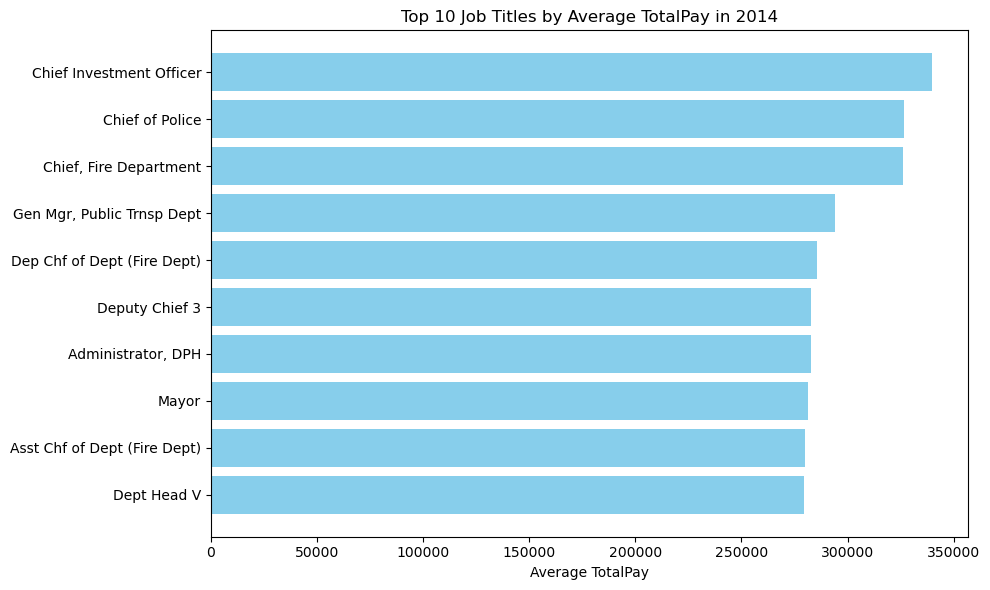

In [53]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("database.sqlite")

# SQL query to get top 10 job titles by average TotalPay in 2014
query = """
SELECT JobTitle, AVG(TotalPay) AS AvgTotalPay
FROM Salaries
WHERE Year = 2014
GROUP BY JobTitle
ORDER BY AvgTotalPay DESC
LIMIT 10;
"""

# Execute the query
top_jobs_2014 = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Plotting
plt.figure(figsize=(10,6))
plt.barh(top_jobs_2014['JobTitle'][::-1], top_jobs_2014['AvgTotalPay'][::-1], color='skyblue')
plt.xlabel('Average TotalPay')
plt.title('Top 10 Job Titles by Average TotalPay in 2014')
plt.tight_layout()
plt.show()


# Q6

In [56]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("database.sqlite")

# SQL query to find job titles with OvertimePay > 150000 excluding 'Not provided'
query = """
SELECT DISTINCT JobTitle, OvertimePay
FROM Salaries
WHERE OvertimePay > 150000
  AND JobTitle != 'Not provided';
"""

# Execute the query
high_overtime_jobs = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Display results
print(high_overtime_jobs)


                          JobTitle  OvertimePay
0  CAPTAIN III (POLICE DEPARTMENT)    245131.88
1     Lieutenant, Fire Suppression    220909.48
2        EMT/Paramedic/Firefighter    192424.49
3                      Firefighter    160418.47
4     Lieutenant, Fire Suppression    163477.81
5                   Deputy Sheriff    196689.18
6                   Deputy Sheriff    156077.49
7                   Deputy Sheriff    173547.73
8                   Deputy Sheriff    173178.23
9                   Deputy Sheriff    169659.92


# Q7

In [59]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("database.sqlite")

# SQL query to find employees with 'CHIEF' in their job titles
query = """
SELECT EmployeeName, JobTitle, TotalPay
FROM Salaries
WHERE UPPER(JobTitle) LIKE '%CHIEF%';
"""

# Execute the query
chief_employees = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Display results
print(chief_employees)


            EmployeeName                                      JobTitle  \
0        PATRICK GARDNER  DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   
1         DAVID SULLIVAN                     ASSISTANT DEPUTY CHIEF II   
2              ALSON LEE            BATTALION CHIEF, (FIRE DEPARTMENT)   
3         MICHAEL MORRIS            BATTALION CHIEF, (FIRE DEPARTMENT)   
4     JOANNE HAYES-WHITE        CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)   
..                   ...                                           ...   
622     Sharon C Jackson                Chief Deputy Adlt Probation Of   
623          Anita S Lee                                   Chief Clerk   
624     George D Vaughan                      Chief Nursery Specialist   
625  Patrick W Gillespie                              Chief Preparator   
626  Christopher L Ochoa                     Chief Stationary Engineer   

      TotalPay  
0    326373.19  
1    316285.74  
2    315981.05  
3    303427.55  
4    302377.73  
..       

# Q8

In [62]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("database.sqlite")

# SQL query to count employees with both 'ENGINEER' and 'FIRE' in job titles in 2012 and 2013
query = """
SELECT Year, COUNT(*) AS EmployeeCount
FROM Salaries
WHERE (UPPER(JobTitle) LIKE '%ENGINEER%' AND UPPER(JobTitle) LIKE '%FIRE%')
  AND Year IN (2012, 2013)
GROUP BY Year;
"""

# Execute the query
engineer_fire_counts = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Display results
print(engineer_fire_counts)


   Year  EmployeeCount
0  2012              8
1  2013              8


# Q9

In [65]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("database.sqlite")

# SQL query to find distinct job titles starting with 'CAPTAIN'
query = """
SELECT DISTINCT JobTitle
FROM Salaries
WHERE UPPER(JobTitle) LIKE 'CAPTAIN%';
"""

# Execute the query
captain_titles = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display results
print(captain_titles)


                                            JobTitle
0                    CAPTAIN III (POLICE DEPARTMENT)
1              CAPTAIN, EMERGENCYCY MEDICAL SERVICES
2                          CAPTAIN, FIRE SUPPRESSION
3  CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ...
4                                          Captain 3
5                          Captain, Fire Suppression
6                        Captain, Emergency Med Svcs
7                         Captain, (Fire Department)


# Q 10

In [68]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("database.sqlite")

# SQL query to find matching employees
query = """
SELECT EmployeeName, JobTitle, BasePay, TotalPay
FROM Salaries
WHERE BasePay > 50000
  AND TotalPay < 150000
  AND JobTitle != 'Not provided';
"""

# Execute the query
filtered_employees = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display results
print(filtered_employees)



               EmployeeName                                      JobTitle  \
0                 JAY DOWKE                            POLICE OFFICER III   
1               MURRAY BOND  MANAGER VI - MUNICIPAL TRANSPORTATION AGENCY   
2               MARILOU GAN                              REGISTERED NURSE   
3             BRIAN COLLINS                                   FIREFIGHTER   
4              GREGORY NEAL                              POLICE OFFICER I   
...                     ...                                           ...   
87255         Renee J Allen                                 Special Nurse   
87256  Melody M Butterworth                     Attorney (Civil/Criminal)   
87257       Stephanie Reidy                                 Special Nurse   
87258        Paul E Maltzer                                     Planner 5   
87259     Kathleen N Yumang                                 Special Nurse   

         BasePay   TotalPay  
0      112380.37  149987.24  
1       149975.

# CONCLUSION OF THE ASSIGMENT

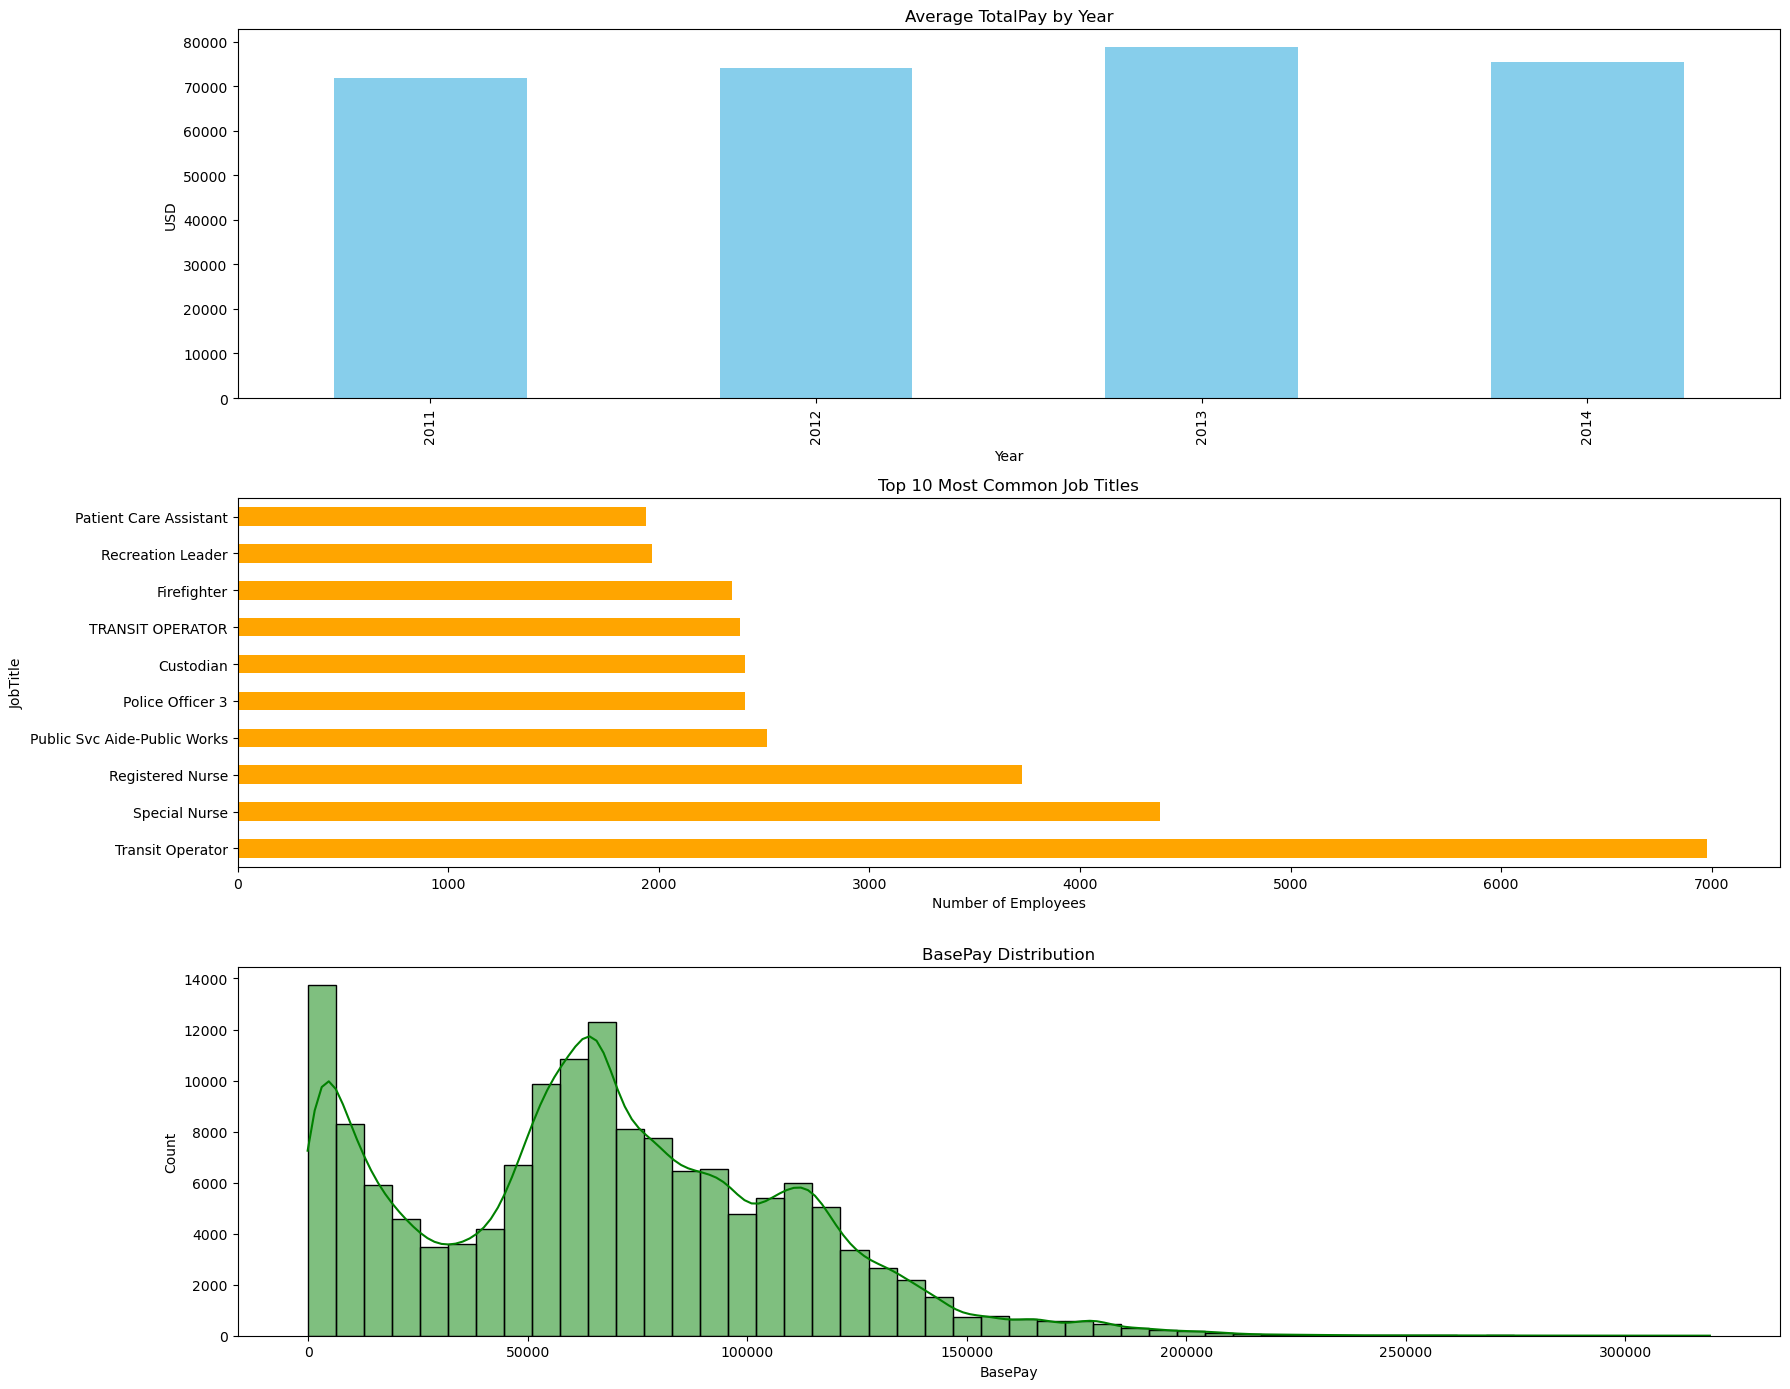

In [79]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect("database.sqlite")

# Load full table
df = pd.read_sql_query("SELECT * FROM Salaries", conn)
conn.close()

# Convert relevant columns to numeric
for col in ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits', 'Year']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop NaNs for visualization
df_clean = df.dropna(subset=['BasePay', 'OvertimePay', 'TotalPay', 'TotalPayBenefits', 'Year'])

# -------------------------
# 📊 Visualization Section
# -------------------------

plt.figure(figsize=(18, 14))

# 1. Average TotalPay by Year
plt.subplot(3, 1, 1)
df_clean.groupby('Year')['TotalPay'].mean().plot(kind='bar', color='skyblue')
plt.title('Average TotalPay by Year')
plt.ylabel('USD')

# 2. Top 10 Most Common Job Titles
plt.subplot(3, 1, 2)
df_clean['JobTitle'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Employees')

# 3. Distribution of BasePay
plt.subplot(3, 1, 3)
sns.histplot(df_clean['BasePay'], bins=50, kde=True, color='green')
plt.title('BasePay Distribution')
plt.xlabel('BasePay')

plt.tight_layout()
plt.show()


# Explainaition through diffrent kinds of chart 

<Axes: xlabel='Year'>

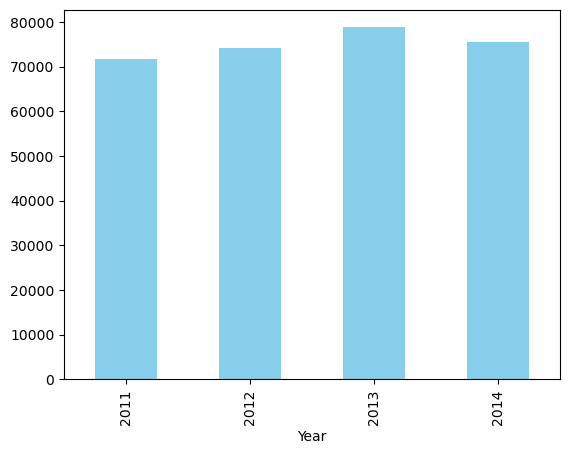

In [81]:
df_clean.groupby('Year')['TotalPay'].mean().plot(kind='bar', color='skyblue')


<Axes: ylabel='JobTitle'>

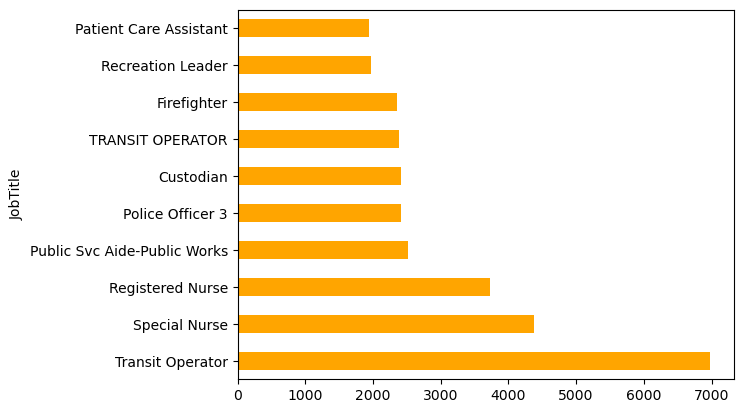

In [83]:
df_clean['JobTitle'].value_counts().head(10).plot(kind='barh', color='orange')


<Axes: xlabel='BasePay', ylabel='Count'>

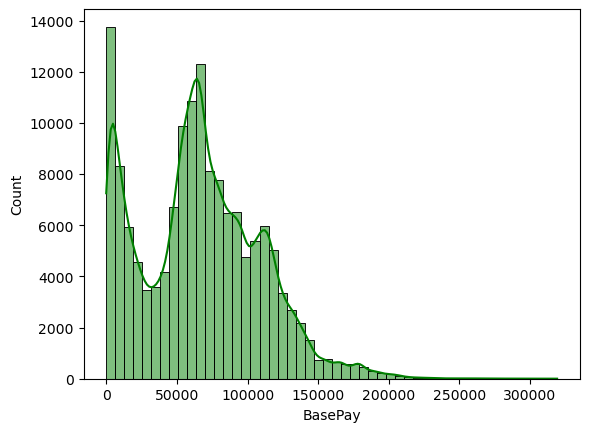

In [85]:
sns.histplot(df_clean['BasePay'], bins=50, kde=True, color='green')


<Axes: xlabel='BasePay', ylabel='OvertimePay'>

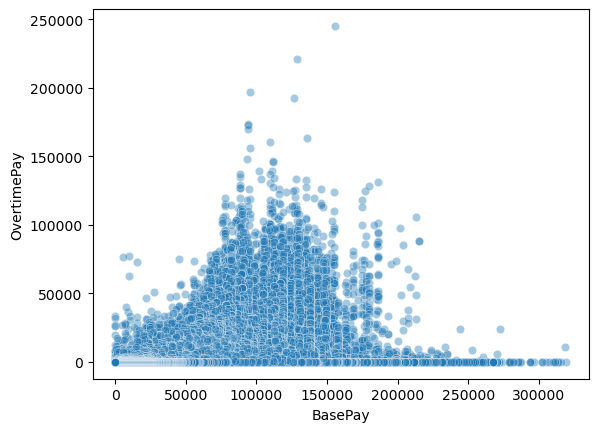

In [87]:
sns.scatterplot(x='BasePay', y='OvertimePay', data=df_clean, alpha=0.4)


<Axes: xlabel='JobTitle', ylabel='TotalPay'>

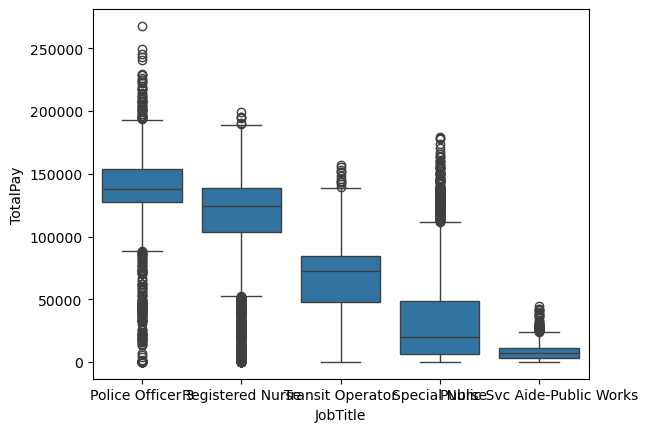

In [89]:
top5_titles = df_clean['JobTitle'].value_counts().head(5).index
sns.boxplot(data=df_clean[df_clean['JobTitle'].isin(top5_titles)], x='JobTitle', y='TotalPay')


<Axes: xlabel='Year'>

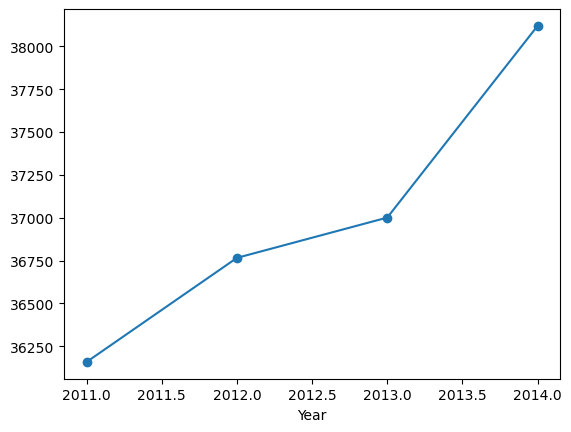

In [91]:
df_clean.groupby('Year')['Id'].count().plot(kind='line', marker='o')
